<h2 align='center' style='color:blue'>Outlier Detection and Removal Using IQR</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("height_weight.csv")

In [ ]:
df

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Histgram for weights**

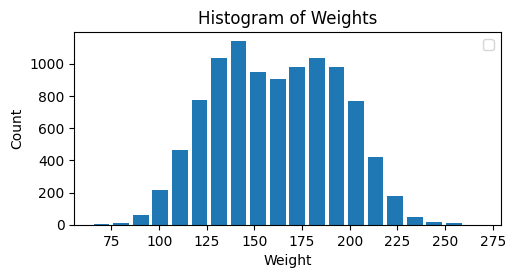

In [ ]:
df.plot(kind='hist', x = 'height', bins = 20, figsize=(5.5, 2.5), rwidth = 0.8) # Use 'y' instead of 'x', specify bins, and figsize
plt.xlabel("Weight") # add x-axis label
plt.ylabel("Count")  # add y-axis label
plt.title("Histogram of Weights") # add title
plt.legend([])
plt.show()

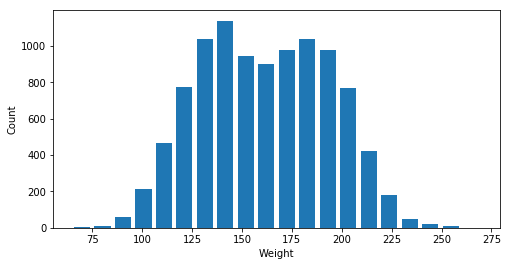

**Histgram for heights**

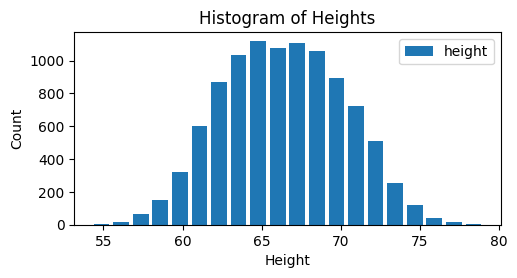

In [ ]:
df.plot(kind='hist', x = 'weight', bins=20, figsize=(5.5, 2.5), rwidth = 0.8) # Use 'y' instead of 'x' and specify bins and figsize
plt.xlabel("Height")  # add x-axis label
plt.ylabel("Count") # add y-axis label
plt.title("Histogram of Heights") # add title
#plt.legend([])
plt.show()

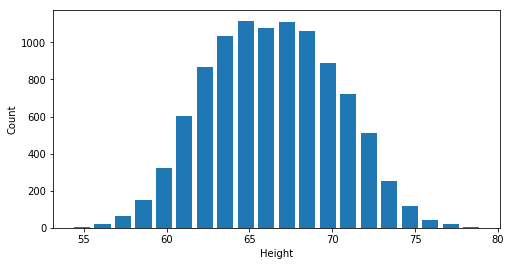

Detect outliers based on weight, Q1, Q3

In [ ]:

Q1_weight = df['weight'].quantile(0.25)

Q3_weight = df['weight'].quantile(0.75)

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight

upper_limit_weight = Q3_weight + 1.5 * IQR_weight

weight_outliers = df[(df['weight'] < lower_limit_weight) | (df['weight'] > upper_limit_weight)]

print("Weight Outliers:")

weight_outliers

Weight Outliers:


,gender,height,weight
2014,Male,78.998742,269.989699


(135.8180513055015, 187.16952486868348)

### IQR

In [ ]:
IQR = Q3 - Q1

IQR

51.35147356318197

51.35147356318197

### Upperlimit, lowerlimit

In [ ]:
lower_limit_weight = Q1_weight - 1.5 * IQR_weight

upper_limit_weight = Q3_weight + 1.5 * IQR_weight

print(lower_limit_weight, upper_limit_weight)

58.79084096072856 264.19673521345646


(58.79084096072856, 264.19673521345646)

### Find the outlier records

In [ ]:
#identifying the weight outliers

Q1_weight = df['weight'].quantile(0.25)

Q3_weight = df['weight'].quantile(0.75)

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight

upper_limit_weight = Q3_weight + 1.5 * IQR_weight

weight_outliers = df[(df['weight'] < lower_limit_weight) | (df['weight'] > upper_limit_weight)]

print("\nWeight Outliers:")

weight_outliers

#identifying the height outliers
Q1_height = df['height'].quantile(0.25)

Q3_height = df['height'].quantile(0.75)

IQR_height = Q3_height - Q1_height

lower_limit_height = Q1_height - 1.5 * IQR_height

upper_limit_height = Q3_height + 1.5 * IQR_height

height_outliers = df[(df['height'] < lower_limit_height) | (df['height'] > upper_limit_height)]

print("\nHeight Outliers:")

height_outliers


Weight Outliers:

Height Outliers:


,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


,gender,height,weight
2014,Male,78.998742,269.989699


**Find the no outlier records**

In [ ]:
no_outliers_df = df[(df['weight'] >= lower_limit_weight) & (df['weight'] <= upper_limit_weight) &
                    (df['height'] >= lower_limit_height) & (df['height'] <= upper_limit_height)]

print("\nNumber of records with no outliers:", len(no_outliers_df))
print("\nRecords with no outliers:")
no_outliers_df


Number of records with no outliers: 9992

Records with no outliers:


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
